In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

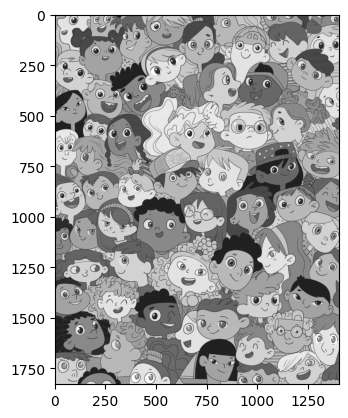

In [10]:
img2 = cv.imread('../Finding/1_target.jpg')
img = cv.imread('../Finding/1_target.jpg', 0)
plt.imshow(img, cmap='gray')

## Visualize the templates

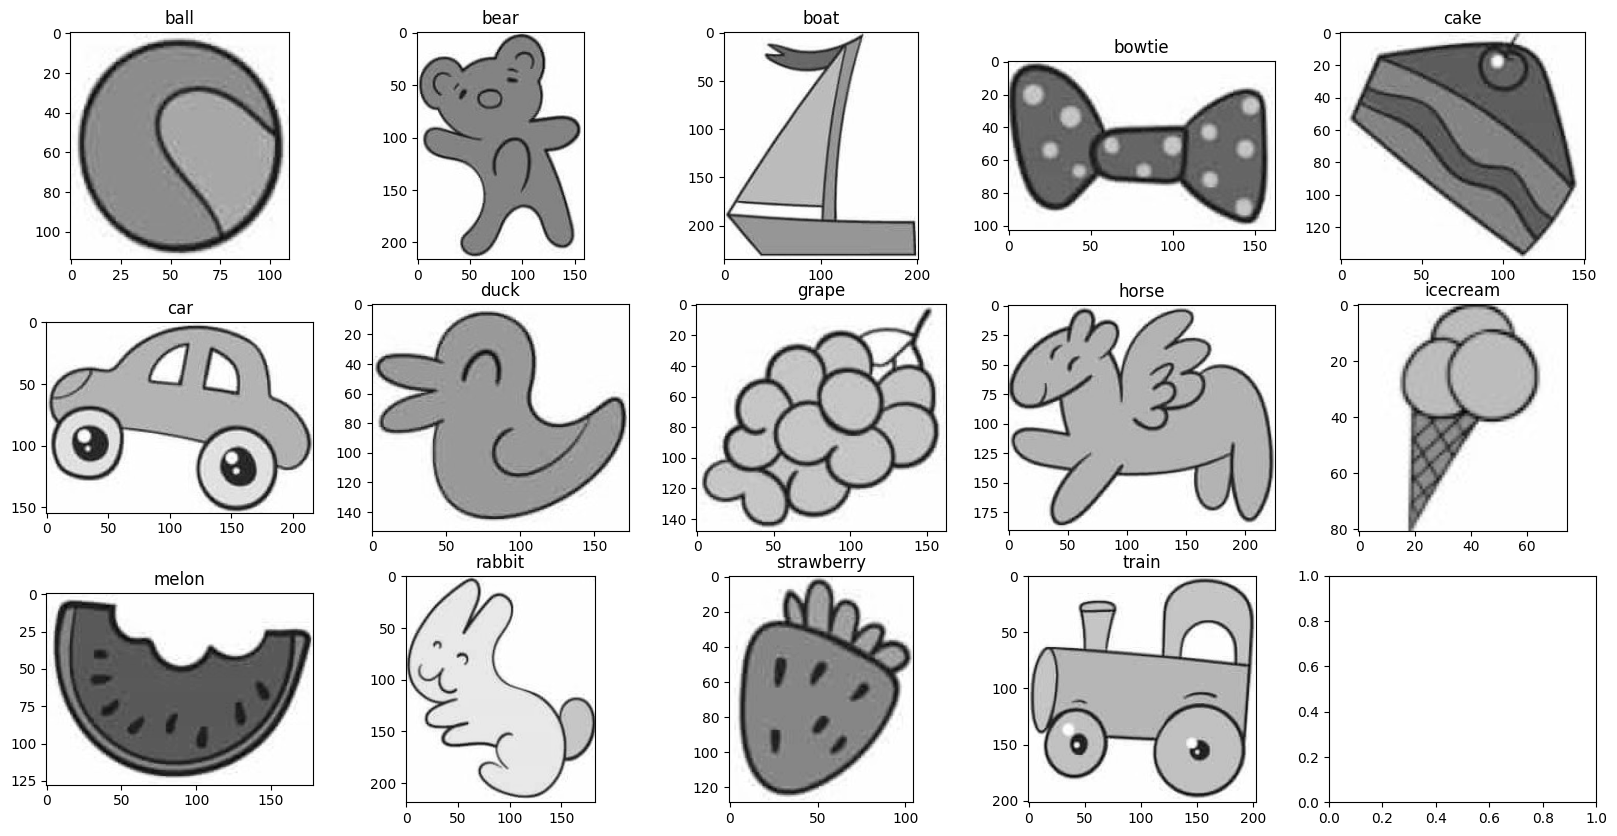

In [11]:
objects = ['ball', 'bear', 'boat', 'bowtie', 'cake', 'car', 'duck', 'grape', 'horse', 'icecream', 'melon', 'rabbit', 'strawberry', 'train']
template_paths = [f'../Finding/1_{object}.jpg' for object in objects]

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

Searching for ball...
Searching for bear...
Searching for boat...
Searching for bowtie...
Searching for cake...
Searching for car...
Searching for duck...
Searching for grape...
Searching for horse...
Searching for icecream...
Searching for melon...
Searching for rabbit...
Searching for strawberry...
Searching for train...


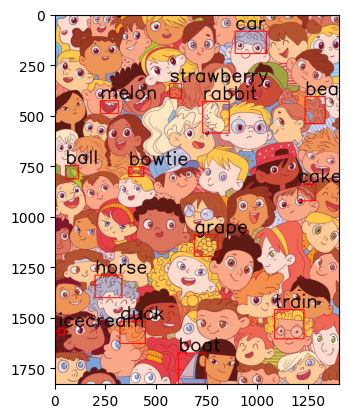

In [12]:
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)

for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)
        _, max_val, _, max_loc = cv.minMaxLoc(result)

        if max_val > best_val:
            best_val = max_val
            best_match = (max_loc, w, h)

    if best_match and best_val >= threshold:
        pt, w, h = best_match
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
        cv.putText(img2, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)

cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()


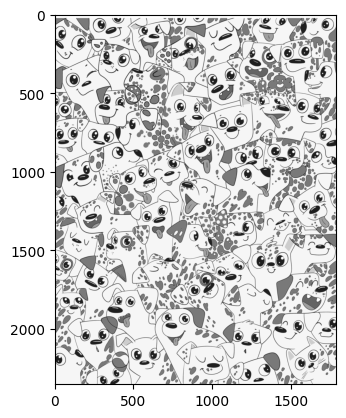

In [13]:
img = cv.imread('../Finding/2.jpg', 0)
img2 = cv.imread('../Finding/2.jpg')
plt.imshow(img, cmap='gray')

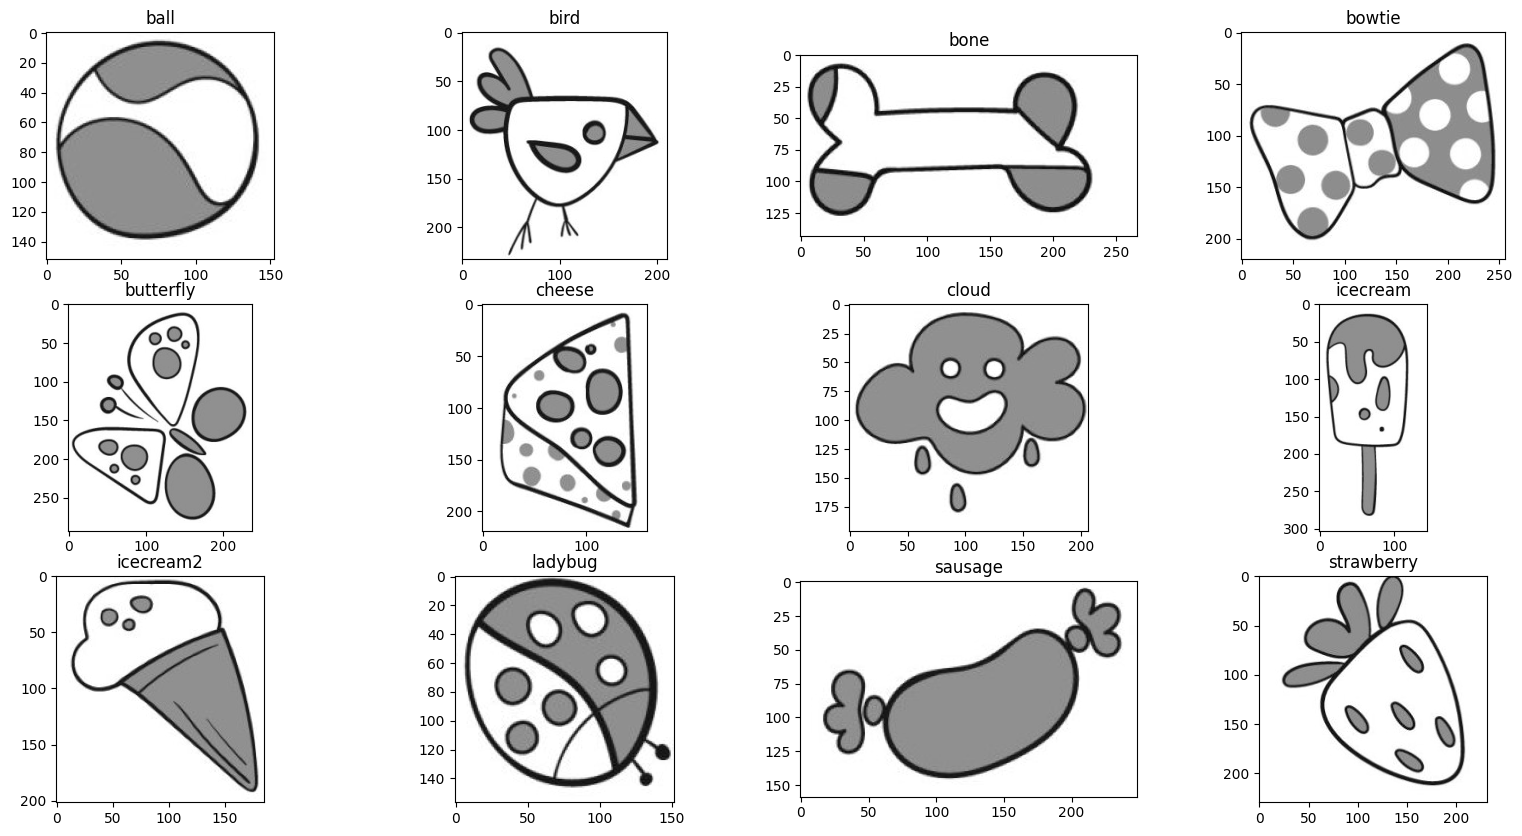

In [14]:
objects = ['ball', 'bird', 'bone', 'bowtie', 'butterfly', 'cheese', 'cloud', 'icecream', 'icecream2', 'ladybug', 'sausage', 'strawberry']
template_paths = [f'../Finding/2_{object}.jpg' for object in objects]

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

Searching for ball...
Searching for bird...
Searching for bone...
Searching for bowtie...
Searching for butterfly...
Searching for cheese...
Searching for cloud...
Searching for icecream...
Searching for icecream2...
Searching for ladybug...
Searching for sausage...
Searching for strawberry...


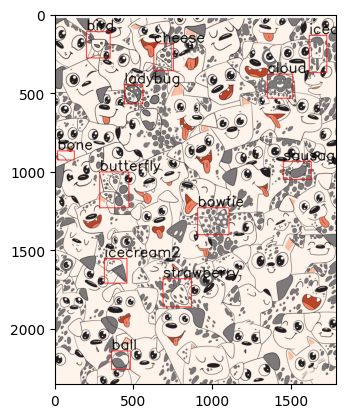

In [15]:
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)

for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)
        _, max_val, _, max_loc = cv.minMaxLoc(result)

        if max_val > best_val:
            best_val = max_val
            best_match = (max_loc, w, h)

    if best_match and best_val >= threshold:
        pt, w, h = best_match
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
        cv.putText(img2, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)

cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()
